# Regression Trees

## *You hugged your tree today?*

Have you heard the term *CART*? Doesn't matter. CART is an acronym for *clasification and regression trees* and is the subject of this exercise. CART encapsulates both *classification* and *regression* trees. Duh, right. For this exercise we'll use the regression half of the term and you can peruse this repositories list for that of the *classification* ilk. Now, let's get to it.

## The Basics

We will consider a probelm with two independent variables and a single dependent variable. Imagine a scatter chart with--

In [1]:
import numpy as np
import matplotlib.pyplot as plt

xs = np.random.random(32)
ys = np.random.random(32)
_ = plt.scatter(xs, ys, color='red')

Oh, there we go. So what the regression tree will do will is it will cosider the *information entropy*, which I will not utter here. Based on this the algorithm will create a split in the data and ask if the split increases the information that we have about our data points. As in, adding value to the manner inwhich we are trying to group our data points, finding optimal splits in our data. There.

The split may look like this:

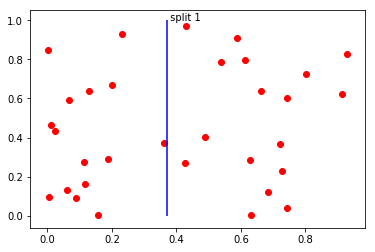

In [2]:
_ = plt.scatter(xs, ys, color='red')
_ = plt.vlines(0.37, 0, 1, colors='blue')
_ = plt.text(0.37, 1, ' split 1')

After this split, it attempts to make another split, that could look like:

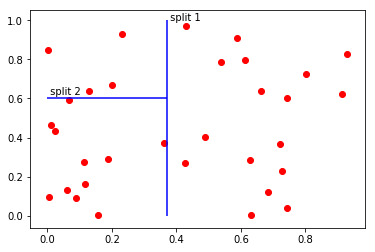

In [3]:
_ = plt.scatter(xs, ys, color='red')
# split 1
_ = plt.vlines(0.37, 0, 1, colors='blue')
_ = plt.text(0.37, 1, ' split 1')
# split 2
_ = plt.hlines(0.6, 0, 0.37, colors='blue')
_ = plt.text(0, 0.62, ' split 2')

And then a few more splits until some threshold is reached and the algorithm stops and it looks like this, maybe:

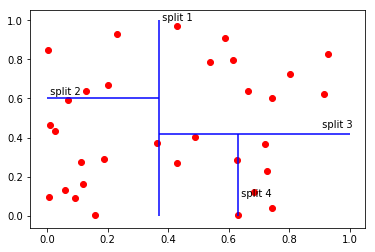

In [4]:
_ = plt.scatter(xs, ys, color='red')
# split 1
_ = plt.vlines(0.37, 0, 1, colors='blue')
_ = plt.text(0.37, 1, ' split 1')
# split 2
_ = plt.hlines(0.6, 0, 0.37, colors='blue')
_ = plt.text(0, 0.62, ' split 2')
# split 3
_ = plt.hlines(0.42, 0.37, 1, colors='blue')
_ = plt.text(0.9, 0.45, ' split 3')
# split 4
_ = plt.vlines(0.63, 0, 0.42, colors='blue')
_ = plt.text(0.63, 0.1, ' split 4')

The decisions to make splits are made based on some criteria. Now what do we do next? What good does this do? What do we put in those boxes (leaves)? Well, we have in the plot two dimensions, and these are our independent features, for sake of example. In third dimension, we will consider our *dependent* variable. The real question we face is *how will we predict the value of an unknown value for the dependent variable that gets added to our dataset?* 

The algorithm will take the new information and decide which leaf the predicted variable will like in based on the the independent variables information we feed the model, and the average of the values (the training dependent variables corresponding to each leaf) within each terminal leaf. If the data we feed the model turns up that the average is in the lower left terminal leaf, based on the data for the independent features, the predicted result for the dependent variable will be whatever the average value for that leaf is.

Let's apply this.

## The Data And The Business Case

We revisit the problem where we are about to extend an offer to a candidate for our company. The person has told us that their salray was \$160k at their last company and they want at least that for this position. We are tasked with determining whether or not that is a bold bluff. Their old company sent us over some data, since they could not release the ex-employee's actual salary. This data has an expected salary assigned to various levels in the company. *Did the candidate really make \$160k in their old position?*

We shall see. Oh, we shall see...

In [5]:
# give me what I need
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
# import the data
df = pd.read_csv('data/Position_Salaries.csv')

# split this data into features and response
X = df.iloc[:,1:2].values
y = df.iloc[:,-1].values

In [7]:
# fit the linear regression
from sklearn.tree import DecisionTreeRegressor
reg = DecisionTreeRegressor(random_state=0)
reg.fit(X,y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=0, splitter='best')

Okay, with the model created and fit, let predict whether or not that \$160k should be taken on good advice.

In [8]:
# predict the new result
# recall from a previous notebook that we determined his old level was 6.5 at previous company
y_pred = reg.predict(6.5)
print('Predicted salary: $', np.round(float(y_pred), 2))

Predicted salary: $ 150000.0


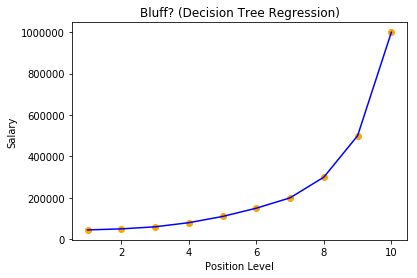

In [9]:
# plot the decision tree regression model
_ = plt.scatter(X, y, color='orange')
_ = plt.plot(X, reg.predict(X), color='blue')
_ = plt.title('Bluff? (Decision Tree Regression)')
_ = plt.xlabel('Position Level')
_ = plt.ylabel('Salary')

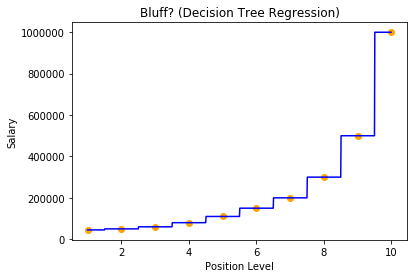

In [10]:
# plot the REAL decision tree regression model
X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
_ = plt.scatter(X, y, color='orange')
_ = plt.plot(X_grid, reg.predict(X_grid), color='blue')
_ = plt.title('Bluff? (Decision Tree Regression)')
_ = plt.xlabel('Position Level')
_ = plt.ylabel('Salary')

Boom. Yeah.

So the model predicts a salary of \$150k, not \$160k. Well, the model we created works well in higher demensions, or more features. For our problem, this may not be the best model to choose, as the terminal leaf our prediction was assigned does not have a continuous "curve" to trace, it just gets lumped into this bucket. Hrm.